In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import Binarizer

diabetes_data = pd.read_csv('../data/Pima Indian Diabetes/diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
diabetes_data['Outcome'].value_counts(dropna=False)

Outcome
0    500
1    268
Name: count, dtype: int64

In [6]:
from clf_evaluation import print_eval

X = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 156, stratify = y)

lr_clf = LogisticRegression(max_iter=1000, solver='liblinear')
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

print_eval(y_test, pred, pred_proba)

Confusion Matrix
[[87 13]
 [22 32]]
Accuracy: 0.7727 Precision: 0.7111 Recall: 0.5926
F1: 0.6465 ROC AUC: 0.8083


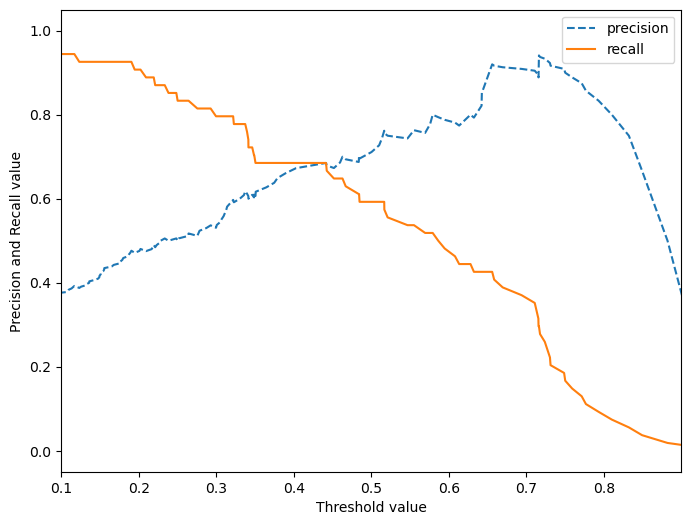

In [7]:
from clf_evaluation import precision_recall_curve_plot

pred_prob_c1 = lr_clf.predict_proba(X_test)[:, 1]
precision_recall_curve_plot(y_test, pred_prob_c1)

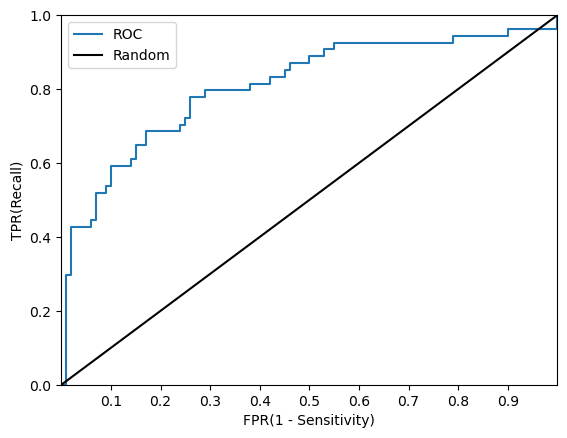

ROC SCORE :  0.8083


In [8]:
from clf_evaluation import roc_curve_plot

roc_curve_plot(y_test, pred_proba)

In [9]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <BarContainer object of 10 artists>)

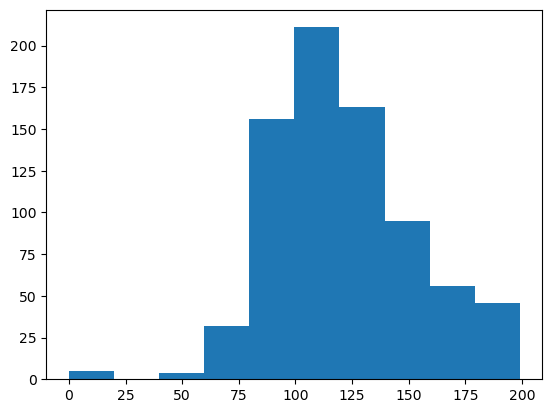

In [10]:
plt.hist(diabetes_data['Glucose'], bins=10)

In [11]:
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

total_count = diabetes_data['Glucose'].count()

for feature in zero_features:
    zero_count = diabetes_data[diabetes_data[feature] == 0][feature].count()
    print(f'{feature} 0 건수는 {zero_count}, 퍼센트는 {zero_count / total_count * 100:.2f}%')

Glucose 0 건수는 5, 퍼센트는 0.65%
BloodPressure 0 건수는 35, 퍼센트는 4.56%
SkinThickness 0 건수는 227, 퍼센트는 29.56%
Insulin 0 건수는 374, 퍼센트는 48.70%
BMI 0 건수는 11, 퍼센트는 1.43%


In [12]:
for feature in zero_features:
    diabetes_data[feature] = diabetes_data[feature].replace(0, diabetes_data[feature].mean())

In [13]:
X = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 156, stratify = y)

lr_clf = LogisticRegression(max_iter=1000, solver='liblinear')
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

print_eval(y_test, pred, pred_proba)


Confusion Matrix
[[90 10]
 [21 33]]
Accuracy: 0.7987 Precision: 0.7674 Recall: 0.6111
F1: 0.6804 ROC AUC: 0.8433


In [14]:
from clf_evaluation import get_eval_by_threshold

thresholds = [0.3, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.50]
get_eval_by_threshold(y_test, pred_proba.reshape(-1, 1), thresholds)


,Accuracy,Precision,Recall,F1,ROC AUC
0.30,0.701299,0.551282,0.796296,0.651515,0.843333
0.33,0.740260,0.597222,0.796296,0.682540,0.843333
0.36,0.746753,0.619048,0.722222,0.666667,0.843333
0.39,0.753247,0.633333,0.703704,0.666667,0.843333
0.42,0.779221,0.692308,0.666667,0.679245,0.843333
0.45,0.785714,0.705882,0.666667,0.685714,0.843333
0.48,0.798701,0.744681,0.648148,0.693069,0.843333
0.50,0.798701,0.767442,0.611111,0.680412,0.843333


In [15]:
binarizer = Binarizer(threshold=0.48)
pred_th_048 = binarizer.fit_transform(pred_proba.reshape(-1, 1))
print_eval(y_test, pred_th_048, pred_proba)

Confusion Matrix
[[88 12]
 [19 35]]
Accuracy: 0.7987 Precision: 0.7447 Recall: 0.6481
F1: 0.6931 ROC AUC: 0.8433
